In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\admin\Documents\NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [4]:
data.shape

(34, 3)

In [5]:
data.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [6]:
data.sample(10)

,Newspaper,daily,sunday
21,Orange County Register,354.843,407.760
16,New Orleans Times-Picayune,272.280,324.241
18,New York Times,1209.225,1762.015
19,Newsday,825.512,960.308
29,San Francisco Chronicle,570.364,704.322
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
14,Miami Herald,444.581,553.479
11,Kansas City Star,288.571,423.305
22,Philadelphia Inquirer,515.523,982.663


In [7]:
data.head(10)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [8]:
data.drop('Newspaper',axis=1).corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: xlabel='daily', ylabel='Density'>

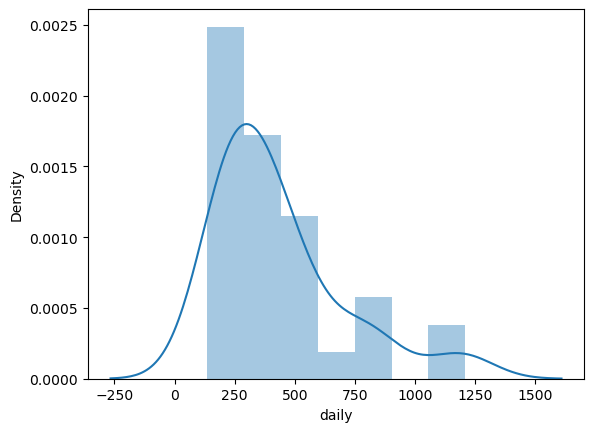

In [9]:
import seaborn as sns
sns.distplot(data['daily'])

<Axes: xlabel='sunday', ylabel='Density'>

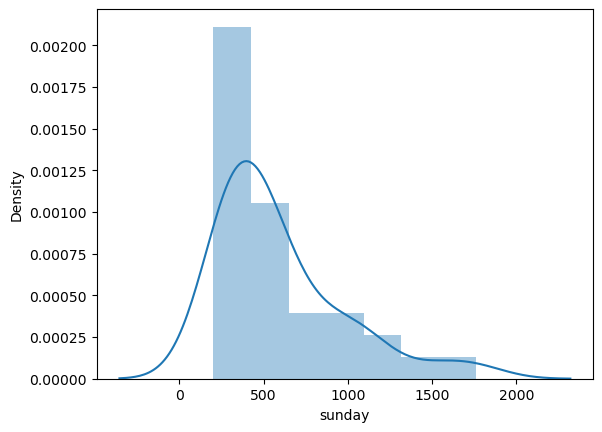

In [10]:
sns.distplot(data['sunday'])

In [17]:


import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()

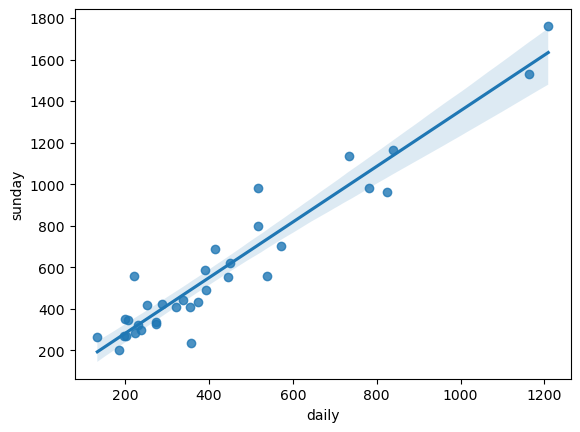

In [22]:
sns.regplot(x="daily",y="sunday",data=data);

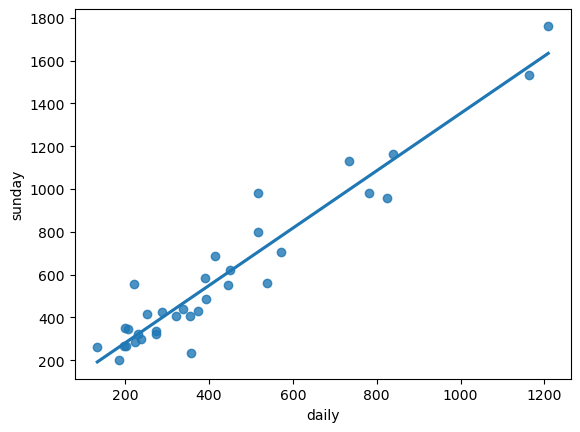

In [24]:
sns.regplot(x="daily",y="sunday",data=data,ci=None);

In [29]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [31]:
print(model.tvalues, '\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [35]:
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [43]:
newdata=pd.Series([200,300])

In [45]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [47]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64

In [49]:
newdata=pd.Series([1000,3000])
newdata

0    1000
1    3000
dtype: int64

In [51]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64